# Task 1 - Prediction using Supervised ML 
Problem Statement : Predict the percentage of an student based on the no. of study hours ?

## **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Dataset : http://bit.ly/w-data

### Author : Zahoor Ansari

In [1]:
# Importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style as style
style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Dataset
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Data Types
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
# Rows and Columns
data.shape

(25, 2)

In [5]:
# Checking Null Values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# Info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# Statistical info about dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


<AxesSubplot:title={'center':'Scores'}, xlabel='Scores', ylabel='Density'>

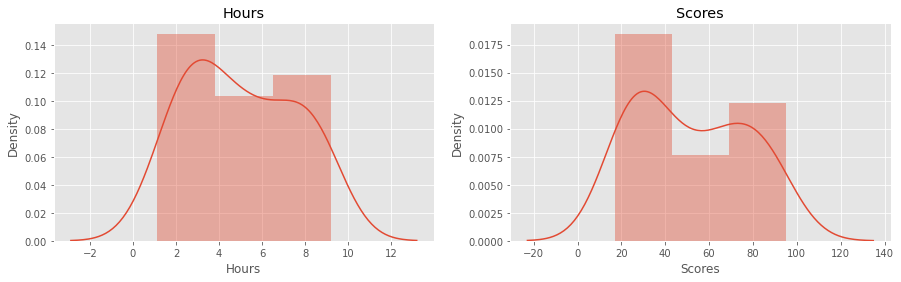

In [8]:
# Distribution of the data

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.title('Hours')
sns.distplot(data.Hours)


plt.subplot(1, 2, 2)
plt.title('Scores')
sns.distplot(data.Scores)

<AxesSubplot:>

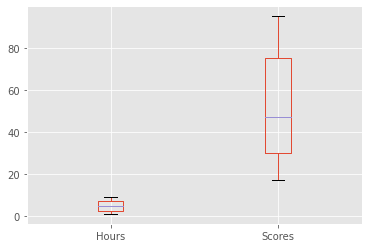

In [9]:
# Outlier detection using boxplot
data.boxplot()

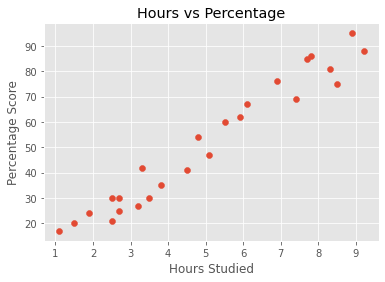

In [10]:
# Visualise the relation between two varaibles

plt.scatter(data.Hours, data.Scores)

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## Model building with sklearn


In [11]:
# Assign the features to x & y

x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [12]:
# Split the records for training & testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

### Train the model

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

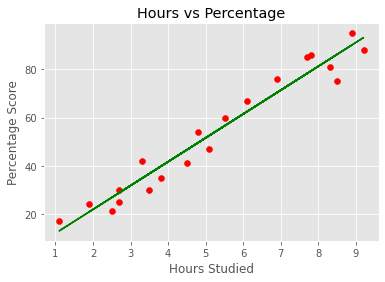

In [14]:
# Visualise Training set result
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train,reg.predict(x_train), color = 'green')

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Test the model

In [15]:
ypred = reg.predict(x_test)
ypred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

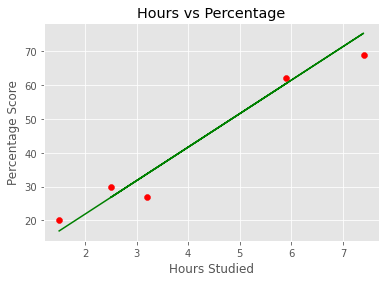

In [16]:
# Visualise Testing set result
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test,reg.predict(x_test), color = 'green')

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## Evaluating the model

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(y_test, ypred))
print('The value of RMSE is ...........', RMSE)

r_square = r2_score(y_test, ypred)
print('The value of Rsquare is ........', r_square)

The value of RMSE is ........... 4.6474476121003665
The value of Rsquare is ........ 0.9454906892105356


## Making Prediction

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [24]:
own_pred = reg.predict(np.array([[9.25]]))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


Hence, If a student studies for 9.25 hrs/day. He/She is likely to score 93.69% (i.e 94%).